In [1]:
!pip install fastai

In [1]:
from fastai.vision import *

In [2]:
#dataset imported from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="mh3o6FrDhA4CRScWn6rg")
project = rf.workspace().project("sb3")
dataset = project.version(1).download("folder")


     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 45.3 MB/s 
     |████████████████████████████████| 1.1 MB 32.5 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 138 kB 46.0 MB/s 
     |████████████████████████████████| 596 kB 40.5 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to SB3-1 in folder:: 100%|██████████| 2649/2649 [00:03<00:00, 857.46it/s]


In [3]:
#build fastai dataset loader
np.random.seed(42)
#fastai automatically factors the ./train and ./valid folders into seperate datasets
#more details https://docs.fast.ai/vision.data.html#ImageDataLoaders.from_folder
path = Path(dataset.location)
data = ImageDataBunch.from_folder(path, size=224, num_workers=4).normalize(imagenet_stats)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [4]:
#double check the data classes
data.classes

['1',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99']

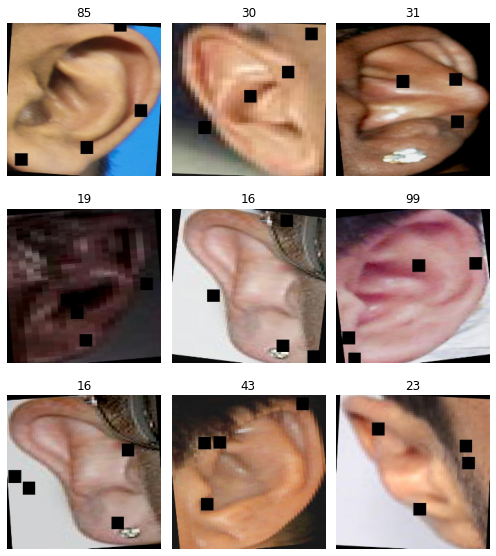

In [5]:
#take a peak at the batch to make sure things were loaded correctly
data.show_batch(rows=3, figsize=(7, 8))

In [6]:
from fastai.metrics import error_rate # 1 - accuracy
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Train custom dataset

In [7]:
from fastai.callbacks import *
early_stop = EarlyStoppingCallback(learn, patience=20)
save_best_model = SaveModelCallback(learn, name='best_resnet34')

In [14]:
#frozen training step
defaults.device = torch.device('cuda') # makes sure the gpu is used
learn.fit_one_cycle(50, callbacks=[early_stop, save_best_model])

epoch,train_loss,valid_loss,error_rate,time
0,0.446046,4.782811,0.880000,00:23
1,0.339481,4.726604,0.865000,00:23
2,0.278976,4.643487,0.865000,00:23
3,0.212106,4.599555,0.860000,00:23
4,0.164264,4.553014,0.860000,00:23
5,0.133156,4.515893,0.855000,00:23
6,0.122521,4.600178,0.820000,00:23
7,0.138768,4.801961,0.865000,00:23
8,0.227808,5.250568,0.880000,00:23
9,0.327987,5.272347,0.865000,00:23


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 4.782811164855957.
Better model found at epoch 1 with valid_loss value: 4.726604461669922.
Better model found at epoch 2 with valid_loss value: 4.643487453460693.
Better model found at epoch 3 with valid_loss value: 4.599554538726807.
Better model found at epoch 4 with valid_loss value: 4.553013801574707.
Better model found at epoch 5 with valid_loss value: 4.515893459320068.
Better model found at epoch 13 with valid_loss value: 4.144692897796631.
Better model found at epoch 28 with valid_loss value: 3.949887990951538.
Better model found at epoch 31 with valid_loss value: 3.779963970184326.
Better model found at epoch 36 with valid_loss value: 3.7234911918640137.
Better model found at epoch 37 with valid_loss value: 3.652977228164673.
Better model found at epoch 41 with valid_loss value: 3.6311397552490234.
Better model found at epoch 49 with valid_loss value: 3.6067590713500977.


In [15]:
#load best model from frozen training
learn.load('best_resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (2097 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
47,47,47,47,47
Path: /content/SB3-1;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
47,47,47,17,17
Path: /content/SB3-1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [16]:
learn.unfreeze()

In [17]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    min_loss_index = np.argmin(losses)
    
    
    #loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #return the learning rate that produces the minimum loss divide by 10   
    return lrs[min_loss_index] / 10

In [12]:
optimal_lr = find_appropriate_lr(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [18]:
learn.fit_one_cycle(50, max_lr=slice(optimal_lr/10, optimal_lr), callbacks=[early_stop, save_best_model])

epoch,train_loss,valid_loss,error_rate,time
0,0.000243,3.608559,0.595000,00:23
1,0.000159,3.588856,0.595000,00:23
2,0.000731,3.604762,0.585000,00:23
3,0.000625,3.625469,0.595000,00:23
4,0.000377,3.616164,0.585000,00:23
5,0.000280,3.610128,0.595000,00:23
6,0.000228,3.622620,0.595000,00:23
7,0.000344,3.594604,0.590000,00:23
8,0.000385,3.600490,0.585000,00:23
9,0.000320,3.555654,0.580000,00:23


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Better model found at epoch 0 with valid_loss value: 3.6085593700408936.
Better model found at epoch 1 with valid_loss value: 3.5888562202453613.
Better model found at epoch 9 with valid_loss value: 3.5556540489196777.
Better model found at epoch 10 with valid_loss value: 3.5487749576568604.
Better model found at epoch 24 with valid_loss value: 3.5071444511413574.
Epoch 45: early stopping


In [19]:
learn.load('best_resnet34')

Learner(data=ImageDataBunch;

Train: LabelList (2097 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
47,47,47,47,47
Path: /content/SB3-1;

Valid: LabelList (200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
47,47,47,17,17
Path: /content/SB3-1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

Evaluate Classifier Performance

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


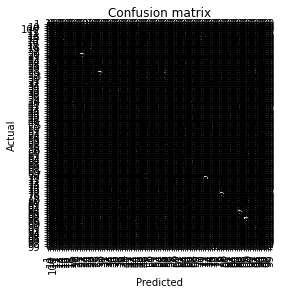

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

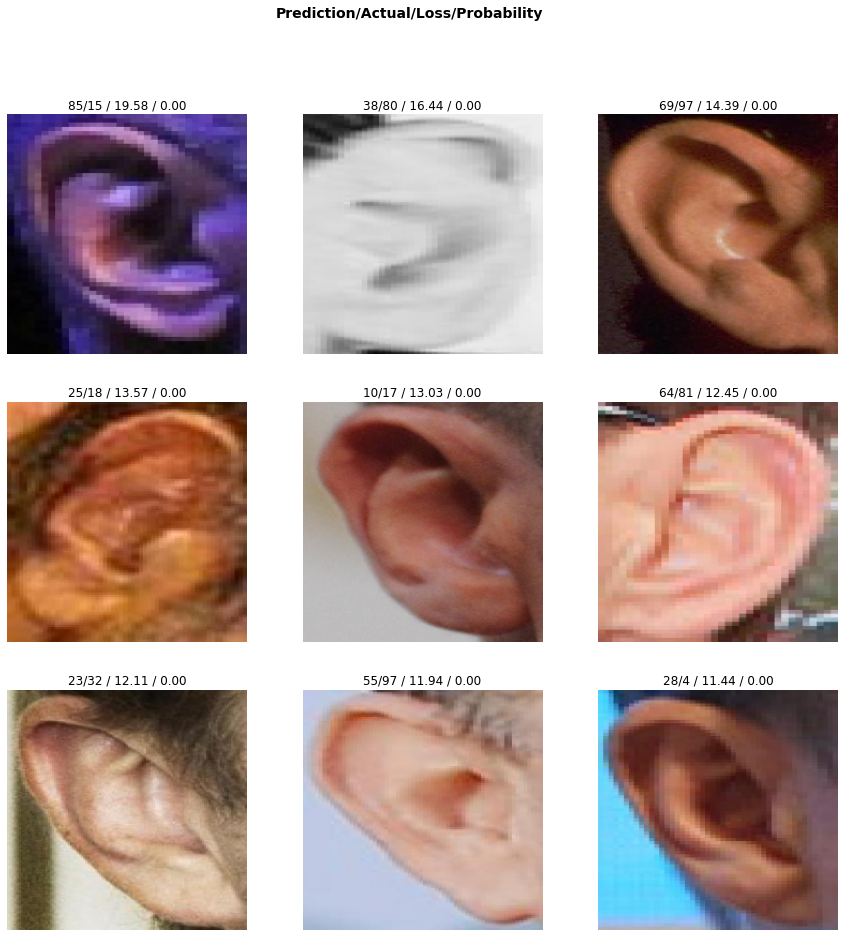

In [21]:
interp.plot_top_losses(9, figsize=(15,15))

In [55]:
#run inference on test images
import glob
from IPython.display import Image, display

model = learn.model
model = model.cuda()

rank1 = 0
all_classifications = 0
rank5 = 0

for imageName in glob.glob('/content/SB3-1/test/*/*.jpg'):
    # print(imageName)
    real_class = imageName[20:23]
    if "/" in real_class:
      if real_class[1] == "/":
        real_class = real_class[0]
      else:
        real_class = real_class[:-1]

    img = open_image(imageName)
    pred_class, pred_idxs, outputs = learn.predict(img)
    top_5_conf, i = outputs.topk(5)

    itr = 0
    # print("Real class: ", real_class)
    classes = data.classes
    for x in i:
        # print(classes[x.item()], top_5_conf[itr].item())
        if str(classes[x.item()]) == real_class:
          rank5 += 1
        itr=itr+1
    # print()
    if str(pred_class) == real_class:
      rank1 += 1
    all_classifications += 1
    # print(prediction)
    # print(prediction[0])
    # display(Image(filename=imageName))
    # print("\n")

print("Rank 1 prediction: ", rank1/all_classifications)
print("Rank 5 prediction: ", rank5/all_classifications)

Rank 1 prediction:  0.44
Rank 5 prediction:  0.62


In [25]:
#model is automatically saved with the "save_best_model" callback
%ls SB3-1/models/

best_resnet34.pth  tmp.pth


In [26]:
from google.colab import files
files.download('./SB3-1/models/best_resnet34.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>